In [67]:
import numpy as np
import pandas as pd

# Preparing data

In [68]:
from sklearn.datasets import make_circles
X,y = make_circles(100, factor=0.1, noise=0.1)
X.shape

(100, 2)

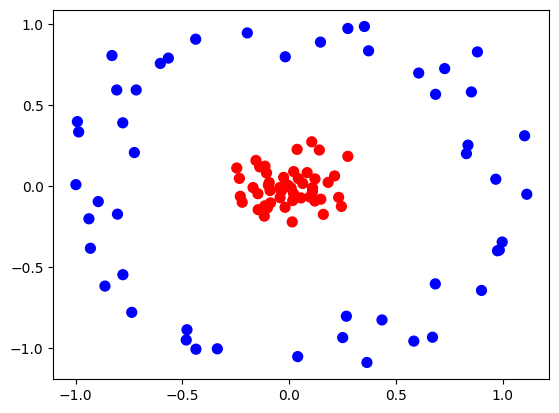

In [69]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='bwr')

# Train Test Split

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [71]:
print(X_train.shape)
print(X_test.shape)

(80, 2)
(20, 2)


# Linear SVM

In [72]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred) * 100

60.0

# Decision Boundary by Linear SVM

C:\Users\Acer1\AppData\Local\Temp\ipykernel_29196\1186774817.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


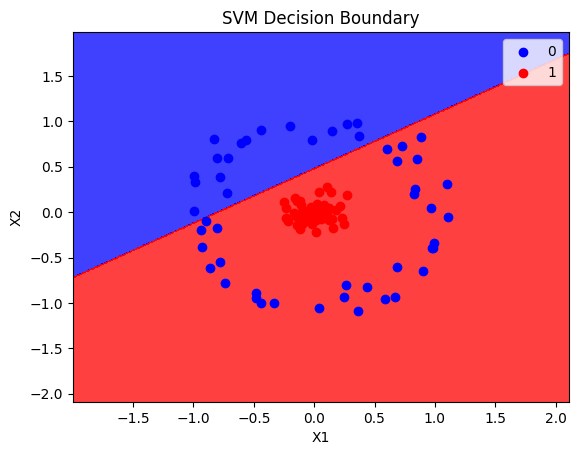

In [74]:
from matplotlib.colors import ListedColormap

zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()


plot_decision_boundary(X, y, clf)


# Kernel Function

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

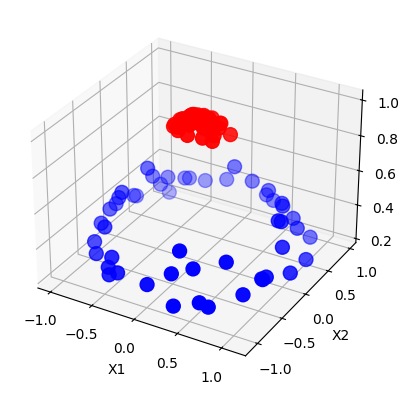

In [75]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))                        # RADIAL BASIS FUNCTION
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

plot_3d_plot(X,y)


# RBF in SVC

In [77]:
rbf = SVC(kernel='rbf')
rbf.fit(X_train,y_train)
y_pred = rbf.predict(X_test)
accuracy_score(y_test,y_pred)*100

100.0

C:\Users\Acer1\AppData\Local\Temp\ipykernel_29196\1186774817.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


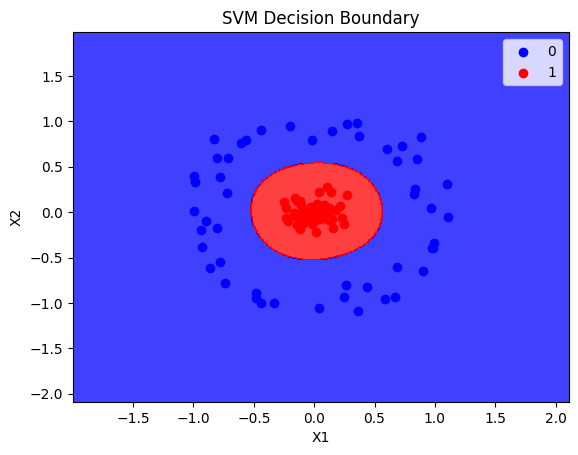

In [78]:
plot_decision_boundary(X,y,rbf)

# Polynomial SVC

In [82]:
poly_clf = SVC(kernel='poly', degree=2)
poly_clf.fit(X_train,y_train)
y_pred = poly_clf.predict(X_test)
accuracy_score(y_test,y_pred)*100

100.0

C:\Users\Acer1\AppData\Local\Temp\ipykernel_29196\1186774817.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


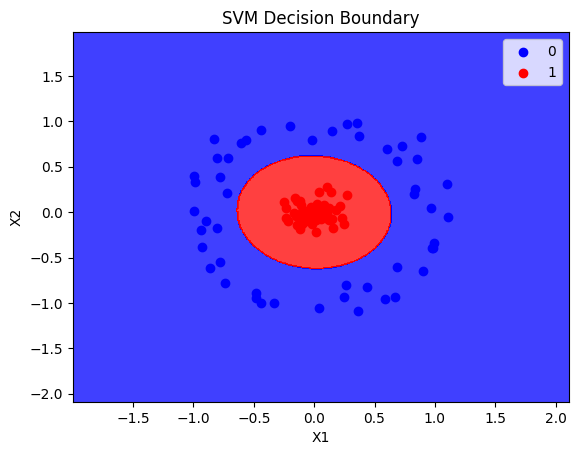

In [83]:
plot_decision_boundary(X,y,poly_clf)